In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
#creating batches
training_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
training_set=training_datagen.flow_from_directory(r'D:\DL_Dataset\emotions\train',target_size=(64,64),batch_size=32,class_mode='binary')

Found 12043 images belonging to 2 classes.


In [3]:
test_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_set=test_datagen.flow_from_directory(r'D:\DL_Dataset\emotions\test',target_size=(64,64),batch_size=32,class_mode='binary')

Found 3021 images belonging to 2 classes.


In [4]:
# Assuming 'cnn' is your Sequential model
cnn = tf.keras.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(64, 64, 3)))


D:\jupyter\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))

In [7]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [8]:
cnn.add(tf.keras.layers.Flatten())

In [9]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [10]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [11]:
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [12]:
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [13]:
cnn.fit(training_set,validation_data=test_set,epochs=10)

Epoch 1/10


D:\jupyter\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


377/377 ━━━━━━━━━━━━━━━━━━━━ 47s 114ms/step - acc: 0.6112 - loss: 0.6595 - val_acc: 0.6865 - val_loss: 0.5832
Epoch 2/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 31s 81ms/step - acc: 0.6968 - loss: 0.5723 - val_acc: 0.7541 - val_loss: 0.5057
Epoch 3/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 32s 84ms/step - acc: 0.7284 - loss: 0.5136 - val_acc: 0.7643 - val_loss: 0.4740
Epoch 4/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 33s 85ms/step - acc: 0.7597 - loss: 0.4765 - val_acc: 0.7762 - val_loss: 0.4654
Epoch 5/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 33s 87ms/step - acc: 0.7724 - loss: 0.4590 - val_acc: 0.7746 - val_loss: 0.4409
Epoch 6/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 32s 85ms/step - acc: 0.7828 - loss: 0.4367 - val_acc: 0.7607 - val_loss: 0.5014
Epoch 7/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 33s 86ms/step - acc: 0.7938 - loss: 0.4162 - val_acc: 0.8027 - val_loss: 0.4198
Epoch 8/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 33s 86ms/step - acc: 0.7987 - loss: 0.4130 - val_acc: 0.7802 - val_loss: 0.4340
Epoch 9/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 31s 81ms/s

In [14]:
import numpy as np
from keras.preprocessing import image

In [15]:
test_image=tf.keras.utils.load_img(r"D:\DL_Dataset\emotions\single prediction\happy_or_sad_02.png")

In [16]:
test_image=tf.keras.utils.img_to_array(test_image)

In [17]:
test_image=np.expand_dims(test_image,axis=0)

In [18]:
result=np.expand_dims(test_image,axis=-1)

In [19]:
if np.any(result[0][0]==1):
    prediction='sad'
else:
    prediction='happy'
print(prediction)

happy


Epoch 1/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 33s 86ms/step - acc: 0.8302 - loss: 0.3638 - val_acc: 0.8093 - val_loss: 0.4090
Epoch 2/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 33s 87ms/step - acc: 0.8383 - loss: 0.3529 - val_acc: 0.8034 - val_loss: 0.4148
Epoch 3/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 33s 86ms/step - acc: 0.8437 - loss: 0.3420 - val_acc: 0.8083 - val_loss: 0.4062
Epoch 4/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 34s 89ms/step - acc: 0.8493 - loss: 0.3312 - val_acc: 0.8222 - val_loss: 0.3912
Epoch 5/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 30s 78ms/step - acc: 0.8551 - loss: 0.3228 - val_acc: 0.8199 - val_loss: 0.4054
Epoch 6/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 31s 80ms/step - acc: 0.8561 - loss: 0.3134 - val_acc: 0.8064 - val_loss: 0.4200
Epoch 7/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 29s 76ms/step - acc: 0.8613 - loss: 0.3112 - val_acc: 0.8073 - val_loss: 0.4142
Epoch 8/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 29s 77ms/step - acc: 0.8734 - loss: 0.2871 - val_acc: 0.8272 - val_loss: 0.3880
Epoch 9/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 

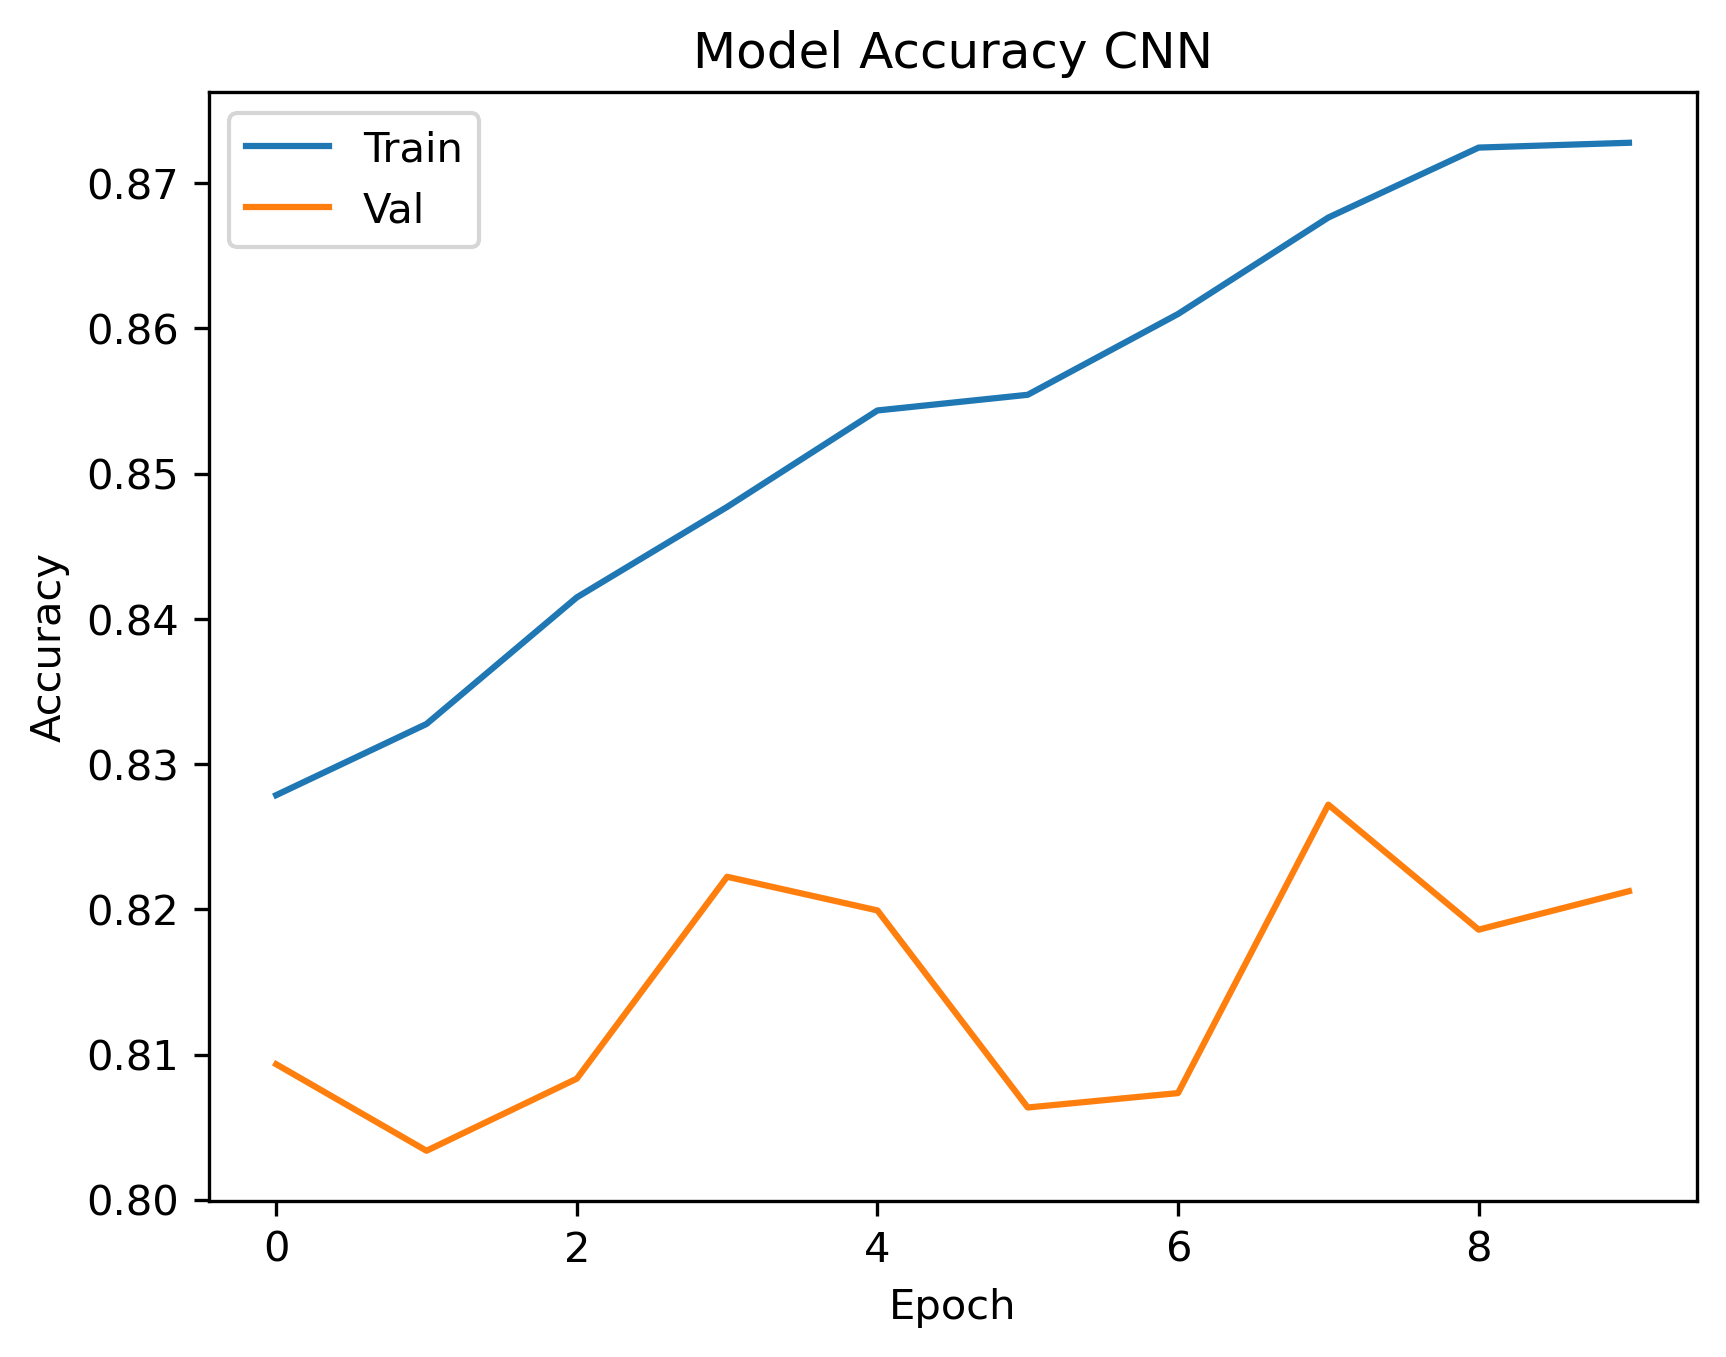

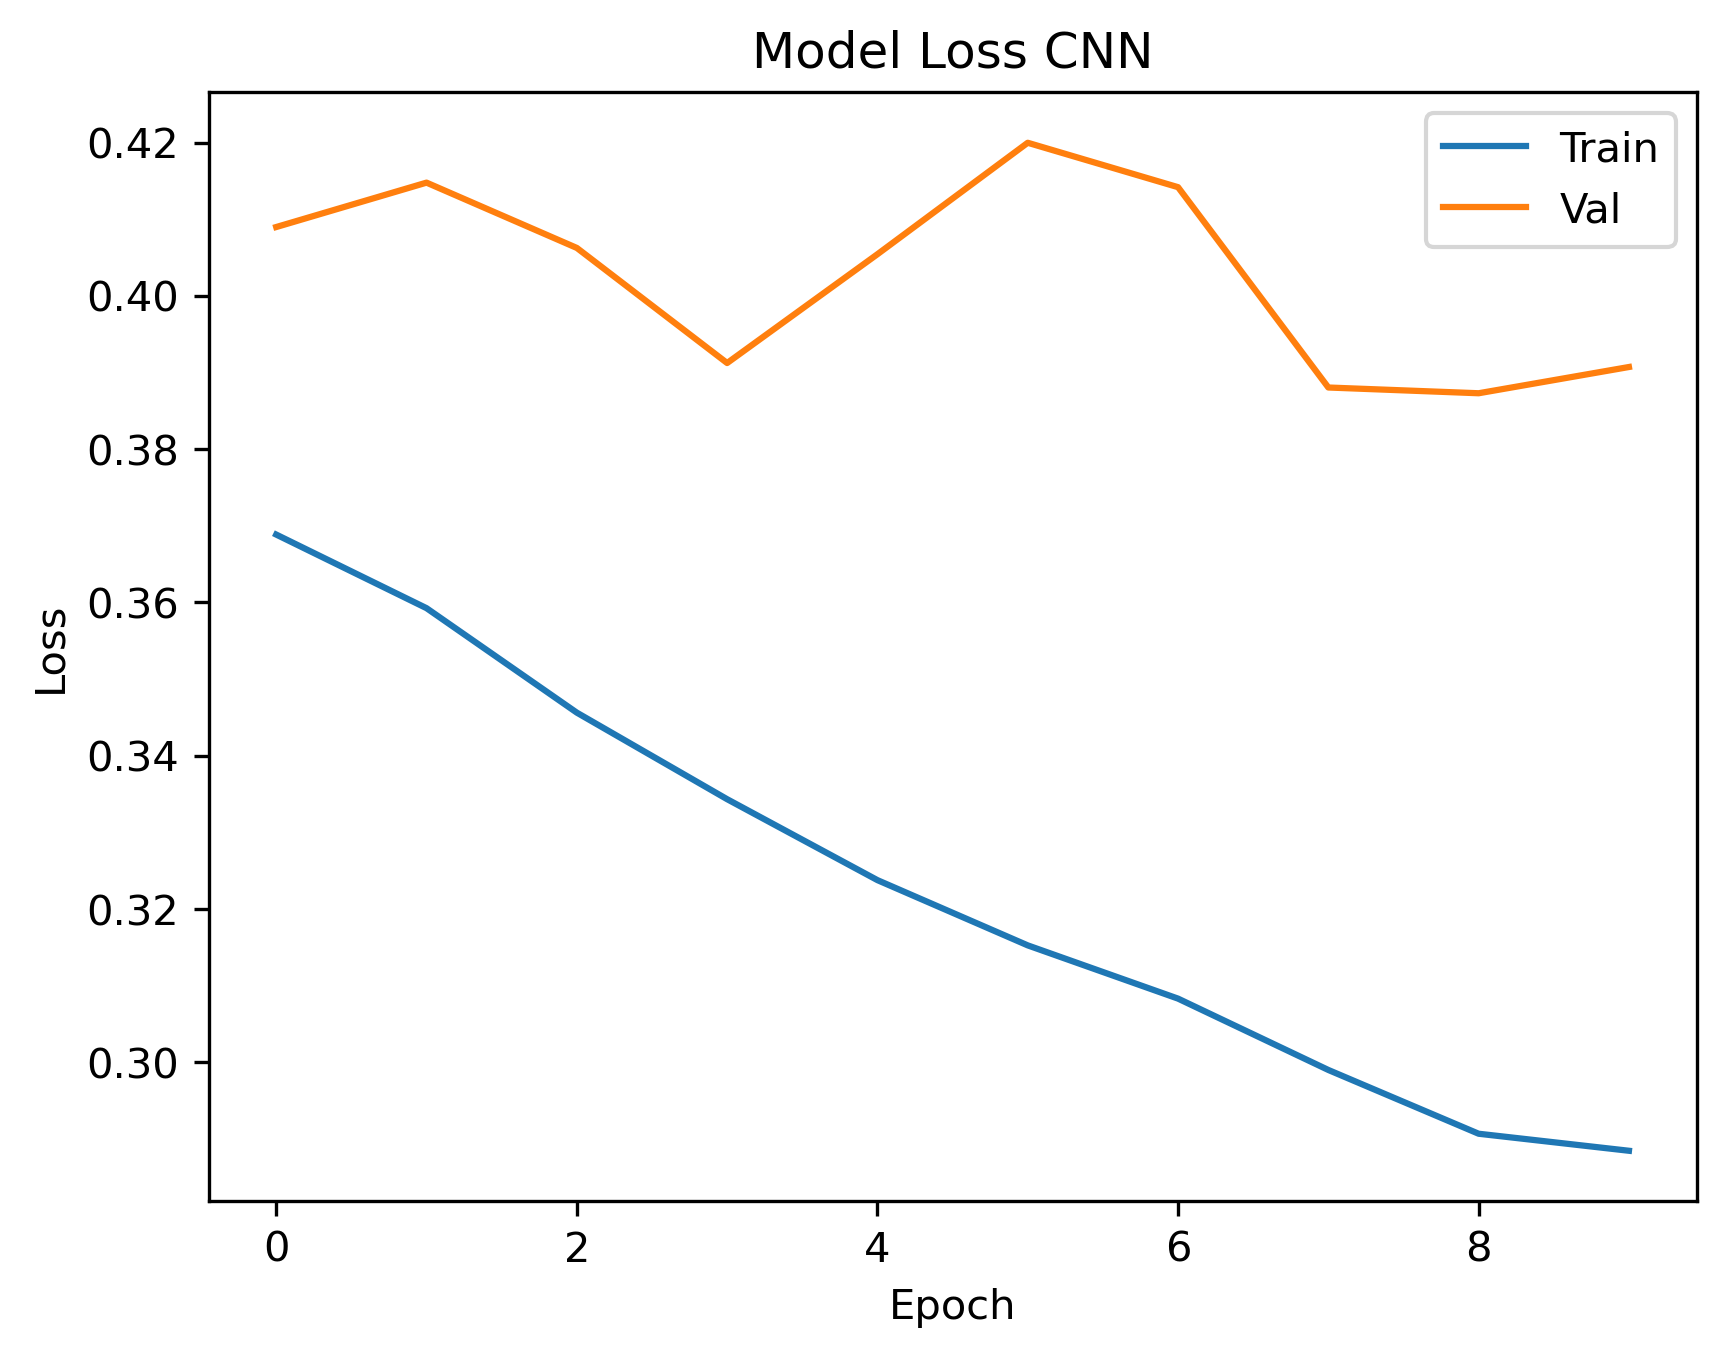

In [20]:
import matplotlib.pyplot as plt
history=cnn.fit(training_set,validation_data=test_set,epochs=10)
#evaluate model on test set
test_loss,test_acc=cnn.evaluate(test_set)
print("Test Loss:",test_loss)
print("Test Accuracy:", test_acc)

#plot the accuracy
plt.figure(dpi=300)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy CNN')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='best')
plt.show()

#plot the loss
plt.figure(dpi=300)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss CNN')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper right')
plt.show()